# E-commerce Customer Churn Analysis and Prediction


## Reading the data into python

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
CustChurnData=pd.read_excel('D:/ML AI/Ecommerce Customer Churn Analysis and Prediction/E Commerce Dataset.xlsx', sheet_name='E Comm', encoding='latin')
print('Shape before deleting duplicate values:', CustChurnData.shape)

# Removing duplicate rows if any
CustChurnData=CustChurnData.drop_duplicates()
print('Shape After deleting duplicate values:', CustChurnData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CustChurnData.head(10)

Shape before deleting duplicate values: (5630, 20)
Shape After deleting duplicate values: (5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


## Defining the problem statement: 
The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.
#### Create a Predictive model which can tell if a customer is going to churn or not?
* Target Variable: Churn

## Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

## Looking at the distribution of Target variable


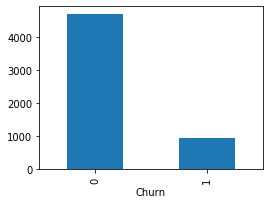

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=CustChurnData.groupby('Churn').size()
GroupedData.plot(kind='bar', figsize=(4,3))

* The Target variable is highly skewed. Hence the dataset is considered imbalanced dataset.
* We will treat the dataset before training the machine learning model

## Basic Data Exploration


In [4]:
CustChurnData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
CustChurnData.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


In [6]:
CustChurnData.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

## Basic Data Exploration Results
* <b>CustomerID</b>: Qualitative. Rejected.
* <b>Churn</b>: Categorical. Selected. This is the <b>Target Variable!</b>
* <b>Tenure</b>: Continuous. Selected.
* <b>PreferredLoginDevice</b>: Categorical. Selected.
* <b>CityTier</b>: Categorical. Selected.
* <b>WarehouseToHome</b>: Continuous. Selected.
* <b>PreferredPaymentMode</b>: Categorical. Selected.
* <b>Gender</b>: Categorical. Selected.
* <b>HourSpendOnApp</b>: Categorical. Selected.
* <b>NumberOfDeviceRegistered</b>: Categorical. Selected.
* <b>PreferedOrderCat</b>: Categorical. Selected. 
* <b>SatisfactionScore</b>: Categorical. Selected.
* <b>MaritalStatus</b>: Categorical. Selected.
* <b>NumberOfAddress</b>: Categorical. Selected.
* <b>Complain</b>: Categorical. Selected.
* <b>OrderAmountHikeFromlastYear</b>: Categorical. Selected.
* <b>CouponUsed</b>: Categorical. Selected.
* <b>DaySinceLastOrder</b>: Categorical. Selected.
* <b>CashbackAmount</b>: Continuous. Selected.

## Removing useless columns from the data

In [7]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
CustChurnData = CustChurnData.drop('CustomerID',axis=1)
CustChurnData.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Visual Exploratory Data Analysis

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots

In [8]:
# Plotting multiple bar charts at once for categorical variables
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(30,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

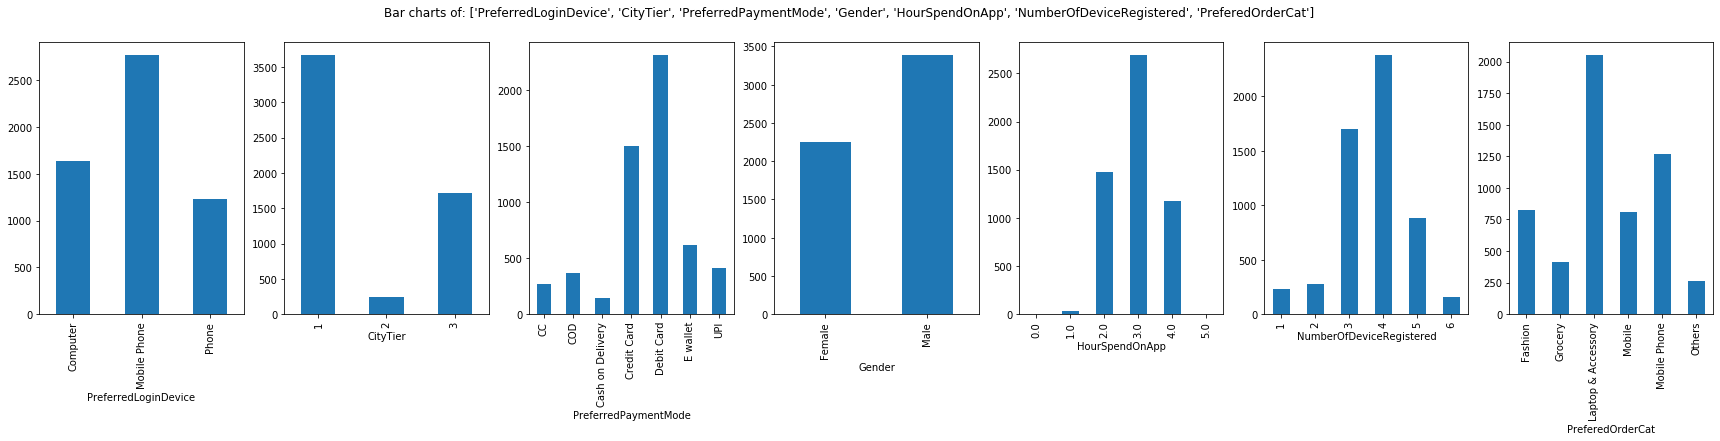

In [9]:
# Calling the function
PlotBarCharts(inpData=CustChurnData, colsToPlot=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode','Gender','HourSpendOnApp','NumberOfDeviceRegistered','PreferedOrderCat'])

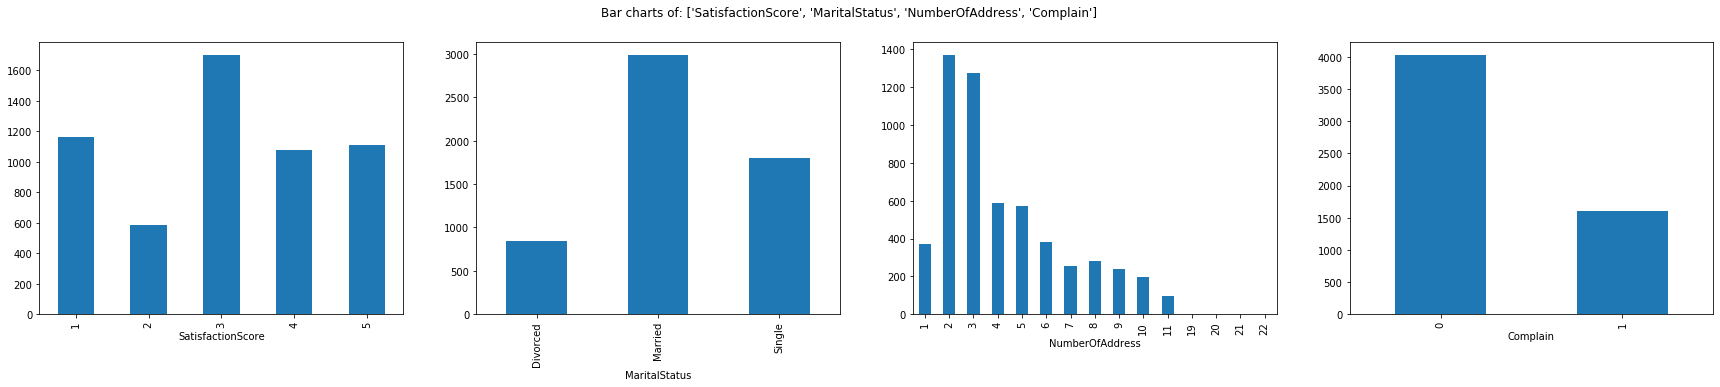

In [13]:
# Calling the function
PlotBarCharts(inpData=CustChurnData, colsToPlot=['SatisfactionScore', 'MaritalStatus','NumberOfAddress','Complain'])

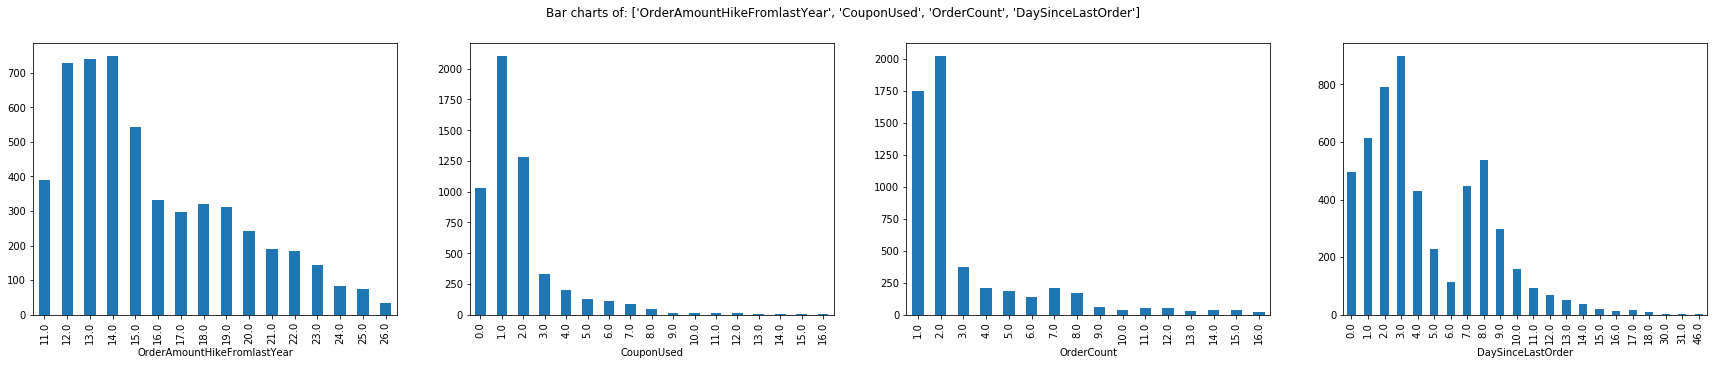

In [11]:
# Calling the function
PlotBarCharts(inpData=CustChurnData, colsToPlot=['OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder'])

### Bar Charts Interpretation
Some of the variables have good while some are little skewed.
We choose all the variables for further analysis

### Visualize distribution of all the Continuous Predictor variables in the data using histograms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205E8534048>,
      dtype=object)

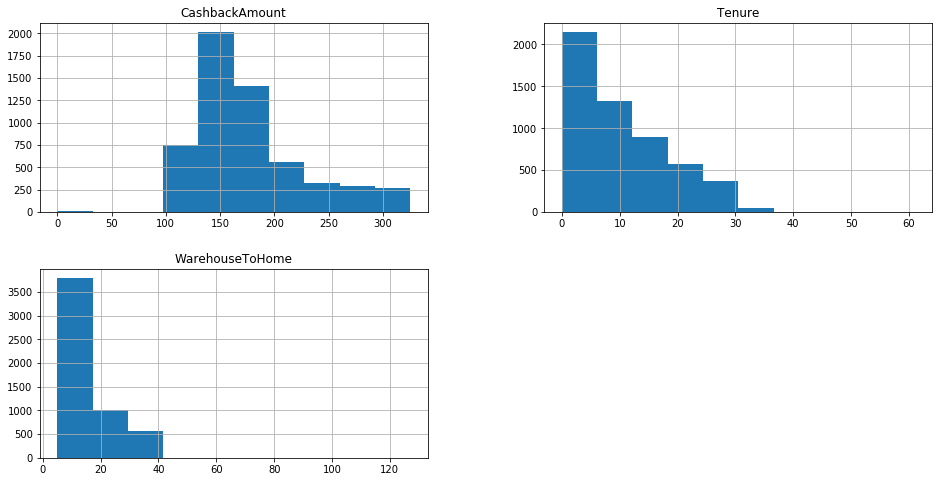

In [12]:
# Plotting histograms of multiple columns together
CustChurnData.hist(['Tenure', 'WarehouseToHome', 'CashbackAmount'], figsize=(16,8))

### Histogram Interpretation
There are some outliers which we need to treat and further analyse

## Outlier Treatment


### Replacing outliers for 'CashbackAmount'

In [19]:
# Finding the number of outliers
CustChurnData['CashbackAmount'][CustChurnData['CashbackAmount']<100].count()

12

In [21]:
# Finding nearest values to 100 mark
CustChurnData['CashbackAmount'][CustChurnData['CashbackAmount']>100].sort_values(ascending=True)

1858    110.09
388     110.09
2072    110.51
602     110.51
2109    110.52
         ...  
3541    324.43
4906    324.73
3436    324.73
2880    324.99
4350    324.99
Name: CashbackAmount, Length: 5618, dtype: float64

In [22]:
# Replacing outliers with nearest possibe value
CustChurnData['CashbackAmount'][CustChurnData['CashbackAmount']<100] = 110.09

### Replacing outliers for 'Tenure'

In [33]:
# Finding the number of outliers
CustChurnData['Tenure'][CustChurnData['Tenure']>35].count()

4

In [34]:
# Finding nearest values to 35 mark
CustChurnData['Tenure'][CustChurnData['Tenure']<35].sort_values(ascending=False)

5369    31.0
5169    31.0
3609    31.0
3899    31.0
4323    31.0
        ... 
2062     0.0
461      0.0
1447     0.0
464      0.0
2778     0.0
Name: Tenure, Length: 5362, dtype: float64

In [35]:
# Replacing outliers with nearest possibe value
CustChurnData['Tenure'][CustChurnData['Tenure']>35] = 31.0

### Replacing outliers for 'Tenure'

In [40]:
# Finding the number of outliers
CustChurnData['WarehouseToHome'][CustChurnData['WarehouseToHome']>40].count()

2

In [41]:
# Finding nearest values to 40 mark
CustChurnData['WarehouseToHome'][CustChurnData['WarehouseToHome']<40].sort_values(ascending=False)

4569    36.0
4116    36.0
3099    36.0
4014    36.0
4984    36.0
        ... 
3490     5.0
1001     5.0
2151     5.0
451      5.0
1401     5.0
Name: WarehouseToHome, Length: 5377, dtype: float64

In [42]:
# Replacing outliers with nearest possibe value
CustChurnData['WarehouseToHome'][CustChurnData['WarehouseToHome']>40] = 36.0

### Visualizing distribution after outlier treatment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205EC1BA788>,
      dtype=object)

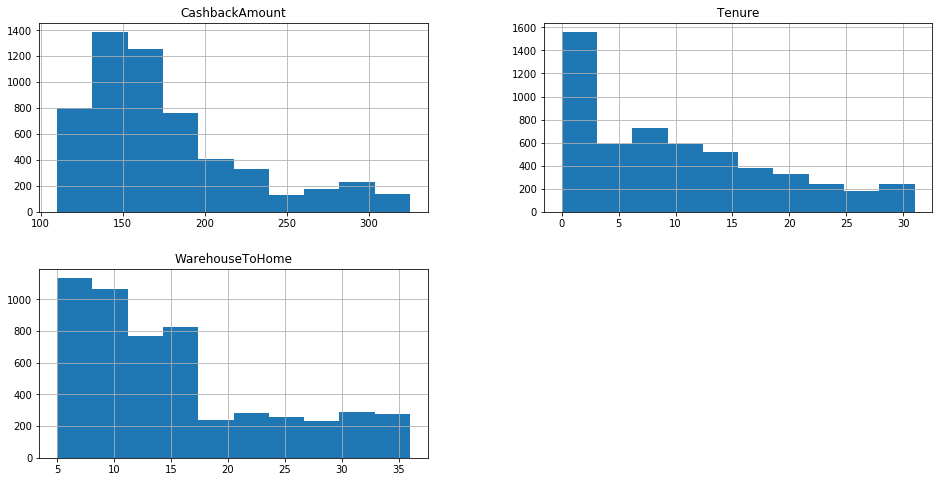

In [43]:
# Plotting histograms of multiple columns together
CustChurnData.hist(['Tenure', 'WarehouseToHome', 'CashbackAmount'], figsize=(16,8))

## Missing values treatment


In [45]:
# Finding how many missing values are there for each column
CustChurnData.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

I am using Median and Mode value for the missing value replacement

In [46]:
# Replacing missing values of Tenure with median value
CustChurnData['Tenure'].fillna(CustChurnData['Tenure'].median(), inplace=True)

# Replacing missing values of WarehouseToHome with median value
CustChurnData['WarehouseToHome'].fillna(CustChurnData['WarehouseToHome'].median(), inplace=True)

# Replacing missing values of HourSpendOnApp with Mode value
CustChurnData['HourSpendOnApp'].fillna(CustChurnData['HourSpendOnApp'].mode()[0], inplace=True)

# Replacing missing values of OrderAmountHikeFromlastYear with Mode value
CustChurnData['OrderAmountHikeFromlastYear'].fillna(CustChurnData['OrderAmountHikeFromlastYear'].mode()[0], inplace=True)

# Replacing missing values of CouponUsed with Mode value
CustChurnData['CouponUsed'].fillna(CustChurnData['CouponUsed'].mode()[0], inplace=True)

# Replacing missing values of OrderCount with Mode value
CustChurnData['OrderCount'].fillna(CustChurnData['OrderCount'].mode()[0], inplace=True)

# Replacing missing values of DaySinceLastOrder with Mode value
CustChurnData['DaySinceLastOrder'].fillna(CustChurnData['DaySinceLastOrder'].mode()[0], inplace=True)

In [47]:
# Checking missing values again after the treatment
CustChurnData.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Feature Selection


### Relationship exploration: Categorical Vs Continuous -- Box Plots


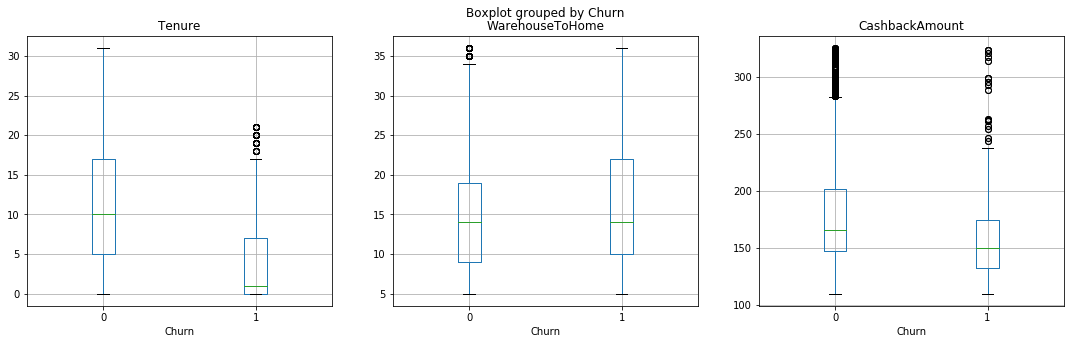

In [49]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['Tenure', 'WarehouseToHome', 'CashbackAmount']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    CustChurnData.boxplot(column=PredictorCol, by='Churn', figsize=(5,5), vert=True, ax=PlotCanvas[i])

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test


In [51]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [52]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Tenure', 'WarehouseToHome', 'CashbackAmount']
FunctionAnova(inpData=CustChurnData, TargetVariable='Churn', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Tenure is correlated with Churn | P-Value: 3.939467357091047e-152
WarehouseToHome is correlated with Churn | P-Value: 3.3060910569656e-08
CashbackAmount is correlated with Churn | P-Value: 1.8296374214913825e-32


['Tenure', 'WarehouseToHome', 'CashbackAmount']

<b>Final selected Continuous columns:</b>
'Tenure', 'WarehouseToHome', 'CashbackAmount'

### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts


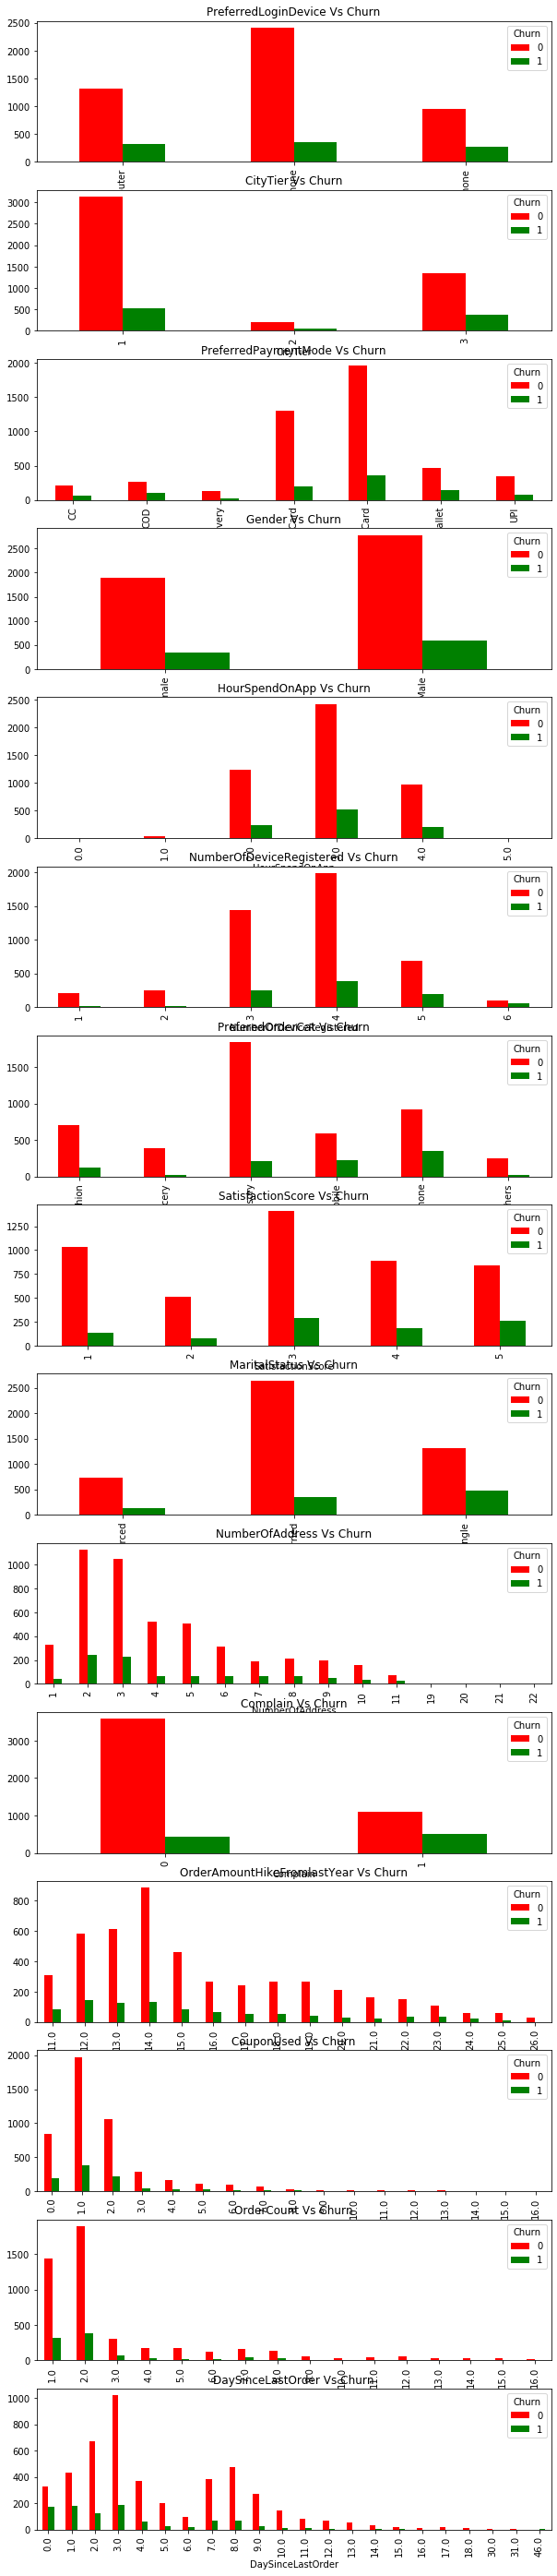

In [56]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode','Gender','HourSpendOnApp','NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore', 'MaritalStatus','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=CustChurnData[CategoricalCol], columns=CustChurnData['Churn'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Churn')

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test


In [57]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [58]:
CategoricalVariables=['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode','Gender','HourSpendOnApp','NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore', 'MaritalStatus','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
# Calling the function
FunctionChisq(inpData=CustChurnData, 
              TargetVariable='Churn',
              CategoricalVariablesList= CategoricalVariables)

PreferredLoginDevice is correlated with Churn | P-Value: 1.0756922373255213e-16
CityTier is correlated with Churn | P-Value: 1.2612000812079956e-09
PreferredPaymentMode is correlated with Churn | P-Value: 9.708708511076305e-15
Gender is correlated with Churn | P-Value: 0.030820940334890086
HourSpendOnApp is NOT correlated with Churn | P-Value: 0.05681772218667576
NumberOfDeviceRegistered is correlated with Churn | P-Value: 4.918442967906057e-16
PreferedOrderCat is correlated with Churn | P-Value: 2.7708325346337454e-60
SatisfactionScore is correlated with Churn | P-Value: 2.4233349782737515e-14
MaritalStatus is correlated with Churn | P-Value: 1.073011277910542e-41
NumberOfAddress is correlated with Churn | P-Value: 4.654564206372349e-09
Complain is correlated with Churn | P-Value: 2.6644609654641377e-78
OrderAmountHikeFromlastYear is correlated with Churn | P-Value: 1.8619470414088724e-05
CouponUsed is NOT correlated with Churn | P-Value: 0.5326551872664829
OrderCount is correlated wi

['PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'OrderCount',
 'DaySinceLastOrder']

<b>Finally selected Categorical variables:</b>
'PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender','NumberOfDeviceRegistered','PreferedOrderCat',
'SatisfactionScore','MaritalStatus','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','OrderCount','DaySinceLastOrder'

## Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning


In [60]:
SelectedColumns=['Tenure', 'WarehouseToHome', 'CashbackAmount','PreferredLoginDevice','CityTier','PreferredPaymentMode',
                 'Gender','NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore','MaritalStatus','NumberOfAddress',
                 'Complain','OrderAmountHikeFromlastYear','OrderCount','DaySinceLastOrder']

# Selecting final columns
DataForML=CustChurnData[SelectedColumns]
DataForML.head()

,Tenure,WarehouseToHome,CashbackAmount,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder
0,4.0,6.0,159.93,Mobile Phone,3,Debit Card,Female,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,5.0
1,9.0,8.0,120.90,Phone,1,UPI,Male,4,Mobile,3,Single,7,1,15.0,1.0,0.0
2,9.0,30.0,120.28,Phone,1,Debit Card,Male,4,Mobile,3,Single,6,1,14.0,1.0,3.0
3,0.0,15.0,134.07,Phone,3,Debit Card,Male,4,Laptop & Accessory,5,Single,8,0,23.0,1.0,3.0
4,0.0,12.0,129.60,Phone,1,CC,Male,3,Mobile,5,Single,3,0,11.0,1.0,3.0


## Converting the binary nominal variable to numeric using 1/0 mapping

In [63]:
# Converting the binary nominal variable sex to numeric
DataForML['Gender'].replace({'Female':0, 'Male':1}, inplace=True)

## Converting the nominal variable to numeric using get_dummies()

In [65]:
# Treating all the nominal variables at once using dummy variables
DataForML=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML['Churn']=CustChurnData['Churn']

# Printing sample rows
DataForML.head()

,Tenure,WarehouseToHome,CashbackAmount,CityTier,Gender,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Churn
0,4.0,6.0,159.93,3,0,3,2,9,1,11.0,...,0,0,1,0,0,0,0,0,1,1
1,9.0,8.0,120.90,1,1,4,3,7,1,15.0,...,0,0,0,1,0,0,0,0,1,1
2,9.0,30.0,120.28,1,1,4,3,6,1,14.0,...,0,0,0,1,0,0,0,0,1,1
3,0.0,15.0,134.07,3,1,4,5,8,0,23.0,...,0,0,1,0,0,0,0,0,1,1
4,0.0,12.0,129.60,1,1,3,5,3,0,11.0,...,0,0,0,1,0,0,0,0,1,1


In [66]:
# Saving this final data for reference during deployment
DataForML.to_pickle('FinalChurnData.pkl')
import os
os.getcwd()

'C:\\Users\\anann\\E-commerce Customer Churn Analysis and Prediction'